In [32]:
%load_ext autoreload
%autoreload 2

# Imports
import pandas as pd

from scenario import LoanScenario

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
# Initial variables

# Constant
vars = ["L", "B"]  # Variables to plot the output for

# R: Yearly interest Rate (R) (in %)
R_dict = {"2023-01-01": 0.46, "2024-01-01": 2.56}

# Set start year and end year
start_year = 2023
end_year = 2025

# BC: Monthly Balance Change (BC) (Income-Expenses)
BC_dict = {"2023-01-01": 500, "2024-01-01": 600}

# Scenario 1
L0 = 10_000  # Start Loan (L) amount
B0 = 5_000  # Start (combined) Balance (B) (overall balance on on your bank accounts)

# LC: Change of the Loan in this period: how much you are adding/repaying per month
LC_dict = {}

s1 = LoanScenario(
    L0=L0,
    B0=B0,
    start_year=start_year,
    end_year=end_year,
    LC_dict=LC_dict,
    R_dict=R_dict,
    BC_dict=BC_dict,
)

# Scenario 2
L0 = 10_000  # Start Loan (L) amount
B0 = 5_000  # Start (combined) Balance (B) (overall balance on on your bank accounts)
LC_dict = {"2024-01-01": 500}

s2 = LoanScenario(
    L0=L0,
    B0=B0,
    start_year=start_year,
    end_year=end_year,
    LC_dict=LC_dict,
    R_dict=R_dict,
    BC_dict=BC_dict,
)

scenarios = {"s1": s1, "s2": s2}
s1.df

,Date,R,LC,BC,L,B
0,2023-01-01,0.46,0.0,500.0,10000.0,5000.0
1,2023-02-01,0.46,0.0,500.0,0.0,0.0
2,2023-03-01,0.46,0.0,500.0,0.0,0.0
3,2023-04-01,0.46,0.0,500.0,0.0,0.0
4,2023-05-01,0.46,0.0,500.0,0.0,0.0
5,2023-06-01,0.46,0.0,500.0,0.0,0.0
6,2023-07-01,0.46,0.0,500.0,0.0,0.0
7,2023-08-01,0.46,0.0,500.0,0.0,0.0
8,2023-09-01,0.46,0.0,500.0,0.0,0.0
9,2023-10-01,0.46,0.0,500.0,0.0,0.0


In [34]:
# Simulate
for s in scenarios.values():
    s.calculate()

# Combine the scenarios into 1 dataframe
results = {v: pd.DataFrame() for v in vars}

for s_name, s in scenarios.items():
    prefix = s_name

    for v in vars:
        results[v]["Date"] = s.df["Date"]
        results[v][f"{prefix}_{v}"] = s.df[v]

for v in vars:
    results[v].set_index("Date", inplace=True)

# Show dataframe
results["L"].head()

,s1_L,s2_L
Date,,
2023-01-01,10000.000000,10000.000000
2023-02-01,10003.895982,10003.895982
2023-03-01,10007.416238,10007.416238
2023-04-01,10011.315109,10011.315109
2023-05-01,10015.089656,10015.089656


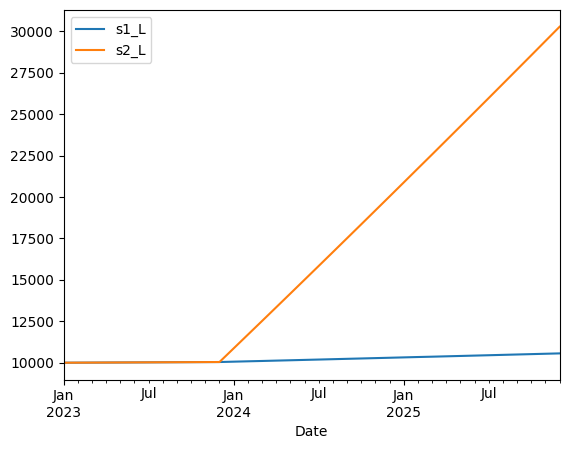

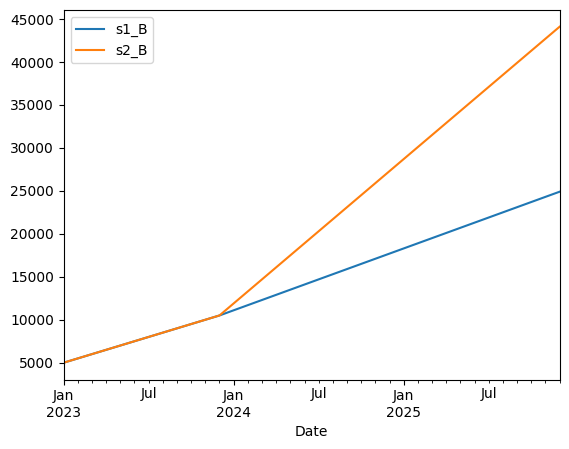

In [35]:
# Show output
for v in vars:
    results[v].plot.line()